# **Crop Prediction**
-----------------------------

## **Business Case-Study**

Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.
Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.
Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!

------------
## **Dataset Description**

-------------------------------
## **Importing Necessary Packages**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv("Crop_recommendation.csv")

---
## **Basic Info**

In [44]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [45]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [77]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.811818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.634908,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,1.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [48]:
df.describe(include='O')

,label
count,2200
unique,22
top,rice
freq,100


In [49]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

-----
## **EDA**

In [50]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [51]:
# Nitrogen cannot be zero in soil its rare.
print('Nitrogen have zero values :',len(df[df['N']==0]))

Nitrogen have zero values : 27


In [52]:
# For each unique crop we have to impute median for zero Nitrogen value according to that crop.

for x in df['label'].unique():
    median = df[(df['N'] > 0) & (df['label'] == x)]['N'].median()
    df.loc[(df['N']==0) & (df['label']== x),'N']=median

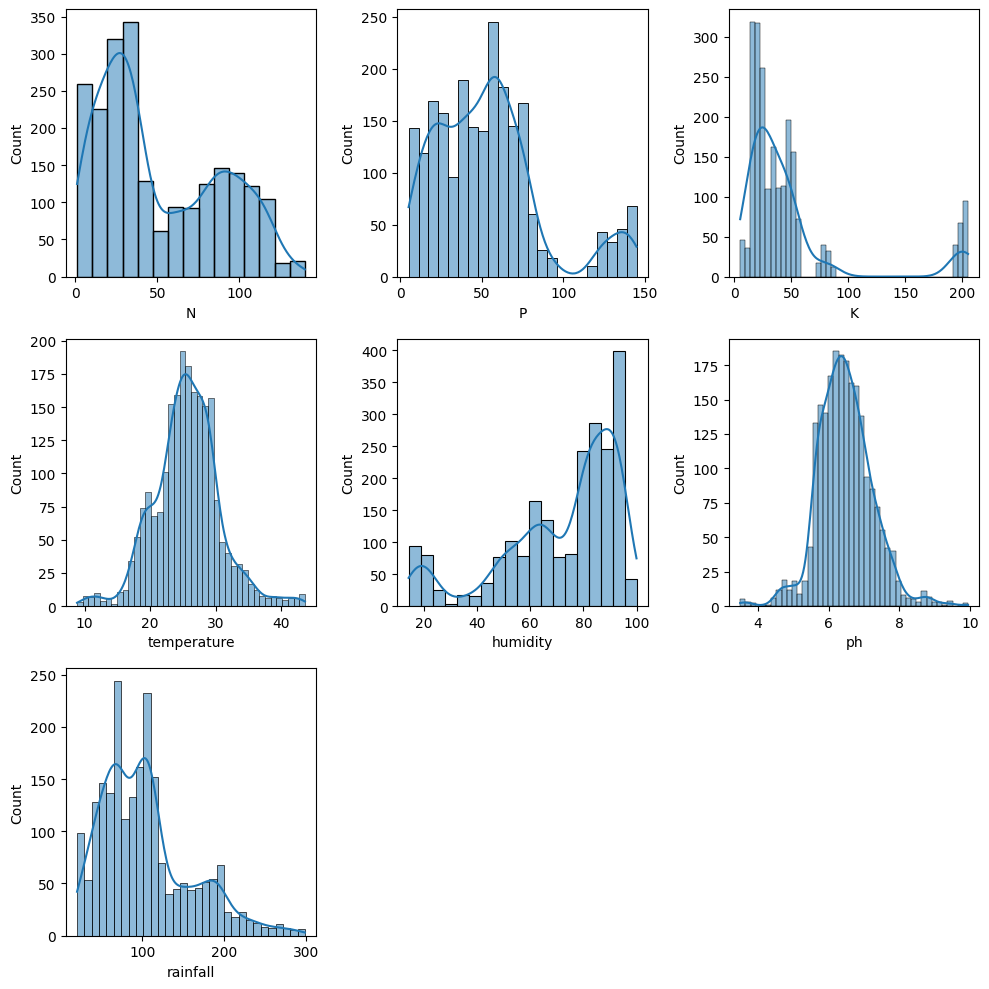

In [53]:
# Graphical Representation of features.
# Univariate Analysis
plt.figure(figsize=(10,10))
i=1
for column in df.drop('label',axis=1):
    plt.subplot(3,3,i)
    sns.histplot(data=df,x=column,kde=True)
    i+=1
plt.tight_layout()
plt.show()

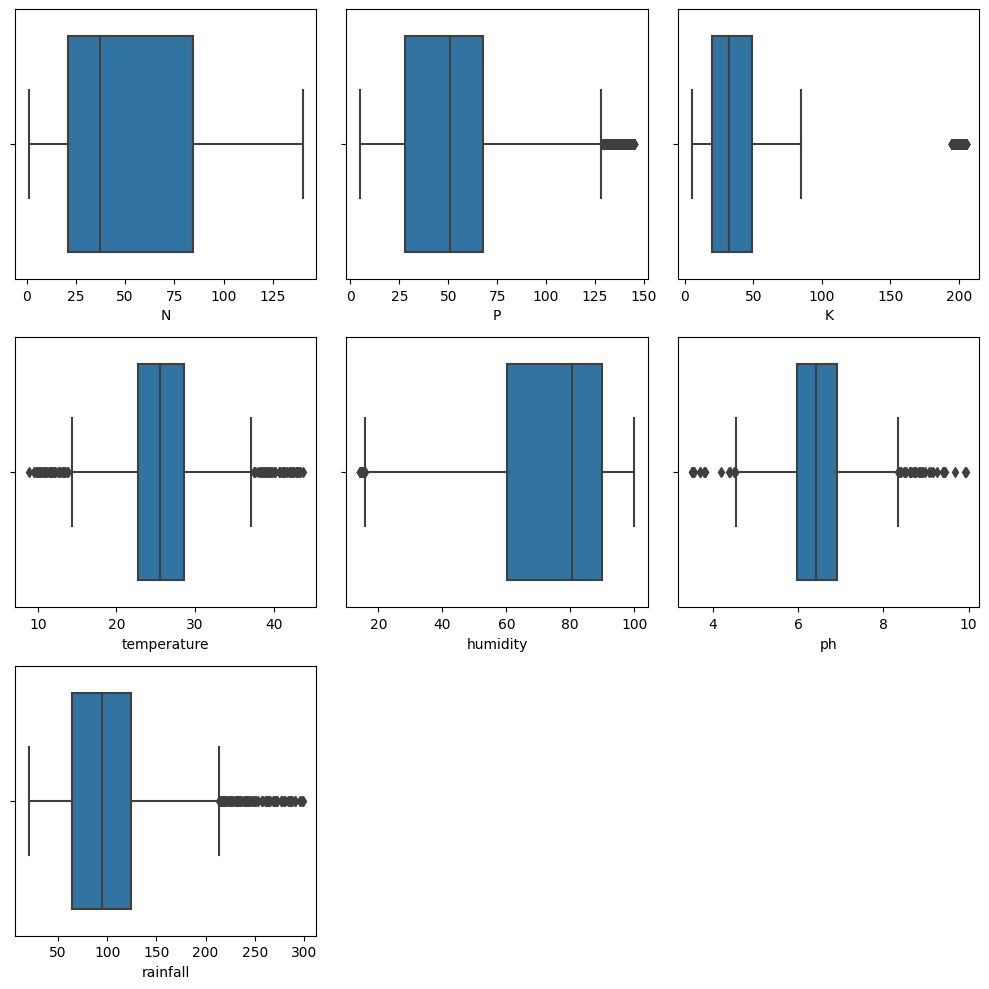

In [54]:
# Boxplot Analysis
plt.figure(figsize=(10,10))
i=1
for column in df.drop('label',axis=1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df,x=column)
    i+=1
plt.tight_layout()
plt.show()

# Since for grapes K lies between 100 to 300 ppm, so we cannot consider it as an outliers.

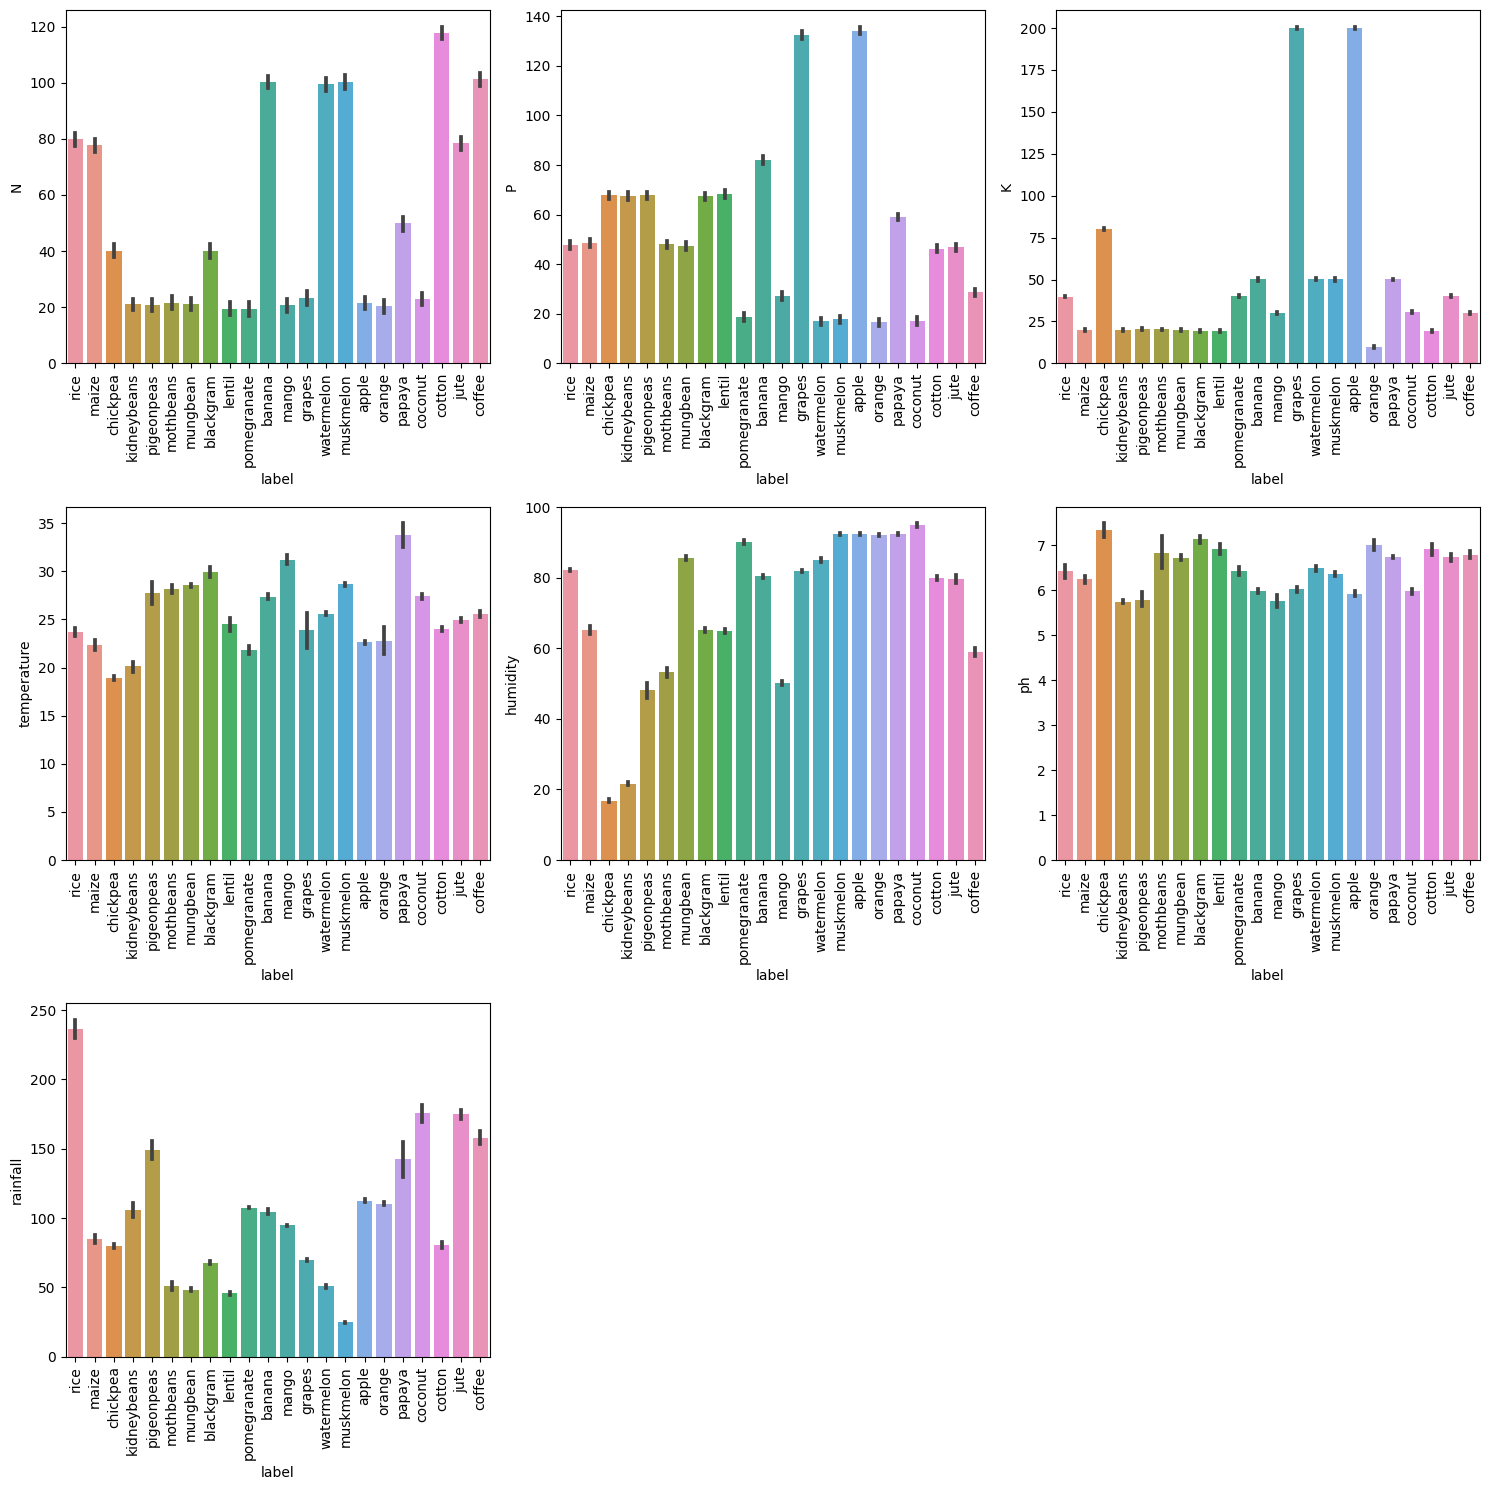

In [55]:
# Bivarite Analysis based on
plt.figure(figsize=(15,15))
i=1
for j in df.drop('label',axis=1):
  plt.subplot(3,3,i)
  sns.barplot(data=df,x='label',y=j)
  plt.xticks(rotation=90)
  i+=1
plt.tight_layout()
plt.show()

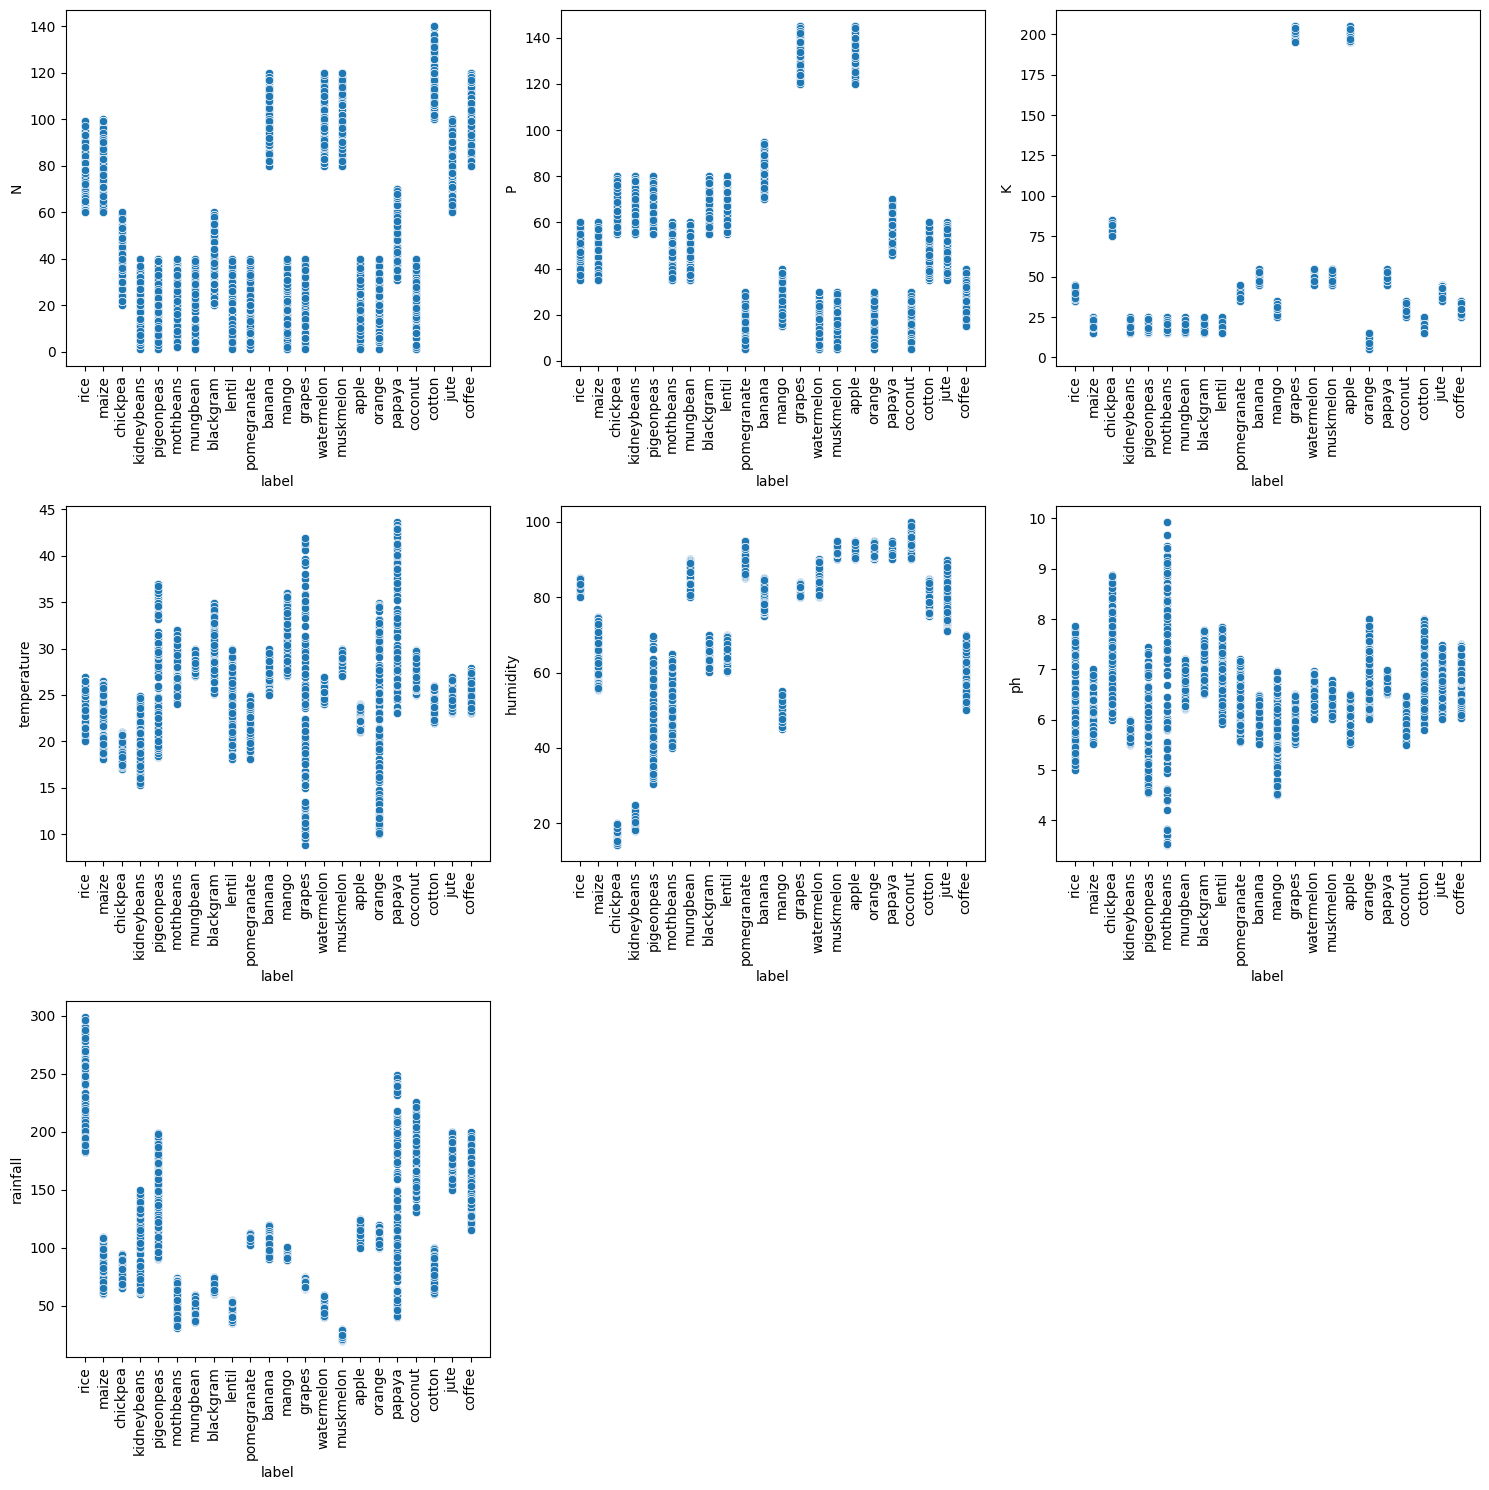

In [56]:
# Scatterplot for better visualization with range of features for crops.
plt.figure(figsize=(15, 15))
i = 1
for col in df.drop('label',axis=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df,x='label',y=col)
    plt.xticks(rotation = 90)
    i+=1
plt.tight_layout()
plt.show()

### Analysis from Graphs


--------
## **Preprocessing**

In [57]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

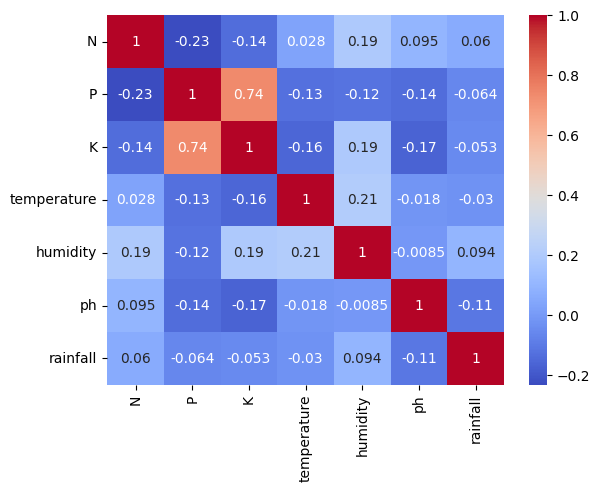

In [58]:
# Heatmap of features
sns.heatmap(data=df.drop('label',axis=1).corr(),annot=True,cmap='coolwarm')
plt.show()

# No correlation found.

--------
## **Model Creation**

1) Decision Tree

2) Random Forest

In [59]:
X = df.drop('label',axis=1)
Y = df['label']

In [60]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
X_scaled=SC.fit_transform(X)
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns)

from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
Y_LE = LE.fit_transform(Y)
Y_LE_df=pd.DataFrame(data=Y_LE,columns=['label'])

In [61]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_scaled_df,Y_LE_df,test_size = 0.25, random_state = 42)
print('Xtrain shape:',Xtrain.shape, '&', 'Xtest shape:',Xtest.shape)

Xtrain shape: (1650, 7) & Xtest shape: (550, 7)


### **1st model : Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [63]:
# Prediction of test data

Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        19
           8       0.83      0.93      0.88        27
           9       1.00      1.00      1.00        24
          10       0.94      1.00      0.97        15
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      0.92      0.96        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

In [64]:
# Checking overfitting of model or not from training dataset

Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        74
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00        73
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        85
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        81
          17       1.00    

In [65]:
# Result of Decision Tree

data=[['Accuracy', '{}%'.format(round(DTC_accur,3)*100)]]
head = ['Result','Decision Tree']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+-----------------+
| Result   | Decision Tree   |
+==========+=================+
| Accuracy | 98.4%           |
+----------+-----------------+


### **2nd Model: Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [67]:
# Prediction of test data

Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        19
           8       0.82      1.00      0.90        27
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

In [68]:
# Checking overfitting of model or not from training dataset

Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        74
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00        73
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        85
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        81
          17       1.00    

In [69]:
# Result of Random Forest

data=[['Accuracy', '{}%'.format(round(RFC_accur,3)*100)]]
head = ['Result','Random Forest']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+-----------------+
| Result   | Random Forest   |
+==========+=================+
| Accuracy | 98.9%           |
+----------+-----------------+


-------
## **Model Comparison Report**:

In [70]:
data = [['Random Forest',RFC_accur*100,'1st'],['Decision Tree',DTC_accur*100,'2nd']]
head = ['Model Name','Testing Accuracy(%)','Ranking order']
print(tabulate(data,headers=head, tablefmt='grid'))

# Best model for this dataset is Random Forest.

+---------------+-----------------------+-----------------+
| Model Name    |   Testing Accuracy(%) | Ranking order   |
+===============+=======================+=================+
| Random Forest |               98.9091 | 1st             |
+---------------+-----------------------+-----------------+
| Decision Tree |               98.3636 | 2nd             |
+---------------+-----------------------+-----------------+


# Deployment

In [71]:
import pickle
with open('RFC.pkl','wb') as f:
    pickle.dump(RFC,f)

with open('scaler.pkl','wb') as f:
    pickle.dump(SC,f)

with open('Label_Encoder.pkl','wb') as f:
    pickle.dump(LE,f)

In [74]:
def User_Data(Data):
    RFC_model = pickle.load(open('RFC.pkl', 'rb'))
    Scaler =  pickle.load(open('scaler.pkl', 'rb'))
    User_Input = Scaler.transform(Data)
    Output = RFC_model.predict(User_Input)[0]
    Crop = LE.inverse_transform([Output])
    return Crop[0]

In [75]:
User_Data([[90,42,43,20,82,6,202]])

'rice'

In [76]:
User_Data([[45,90,70,35,40,12,100]])

'chickpea'